In [2]:
import qiskit
from qiskit_aer.backends.aerbackend import AerBackend

In [3]:
from dc_qiskit_qml.encoding_maps import NormedAmplitudeEncoding
from dc_qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from dc_qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from dc_qiskit_qml.distance_based.hadamard.state.sparsevector import MottonenStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(MottonenStatePreparation())

execution_backend: AerBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_circuit_factory=initial_state_builder,
                                    encoding_map=NormedAmplitudeEncoding())

In [5]:
import numpy as np

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [12]:
pipeline = Pipeline([
    ('scaler',  StandardScaler()),
    ('pca2',  PCA(n_components=2)),
    ('l2norm', Normalizer(norm='l2', copy=True)),
    ('qml', qml)
])

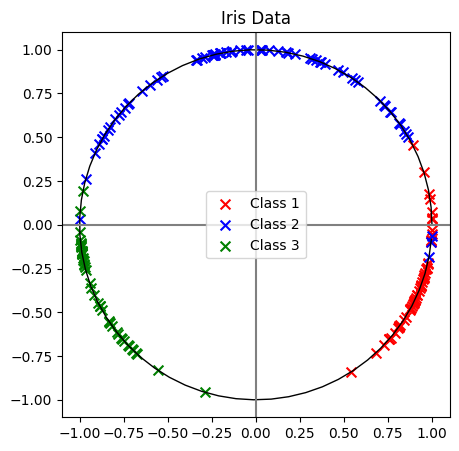

In [16]:
import matplotlib.pyplot as plt


_X = pipeline.fit_transform(X, y)

figure = plt.figure(figsize=(5,5), num=2)
sub1 = figure.subplots(nrows=1, ncols=1)

class_0_data = np.asarray([_X[i] for i in range(len(_X)) if y[i] == 0])
class_1_data = np.asarray([_X[i] for i in range(len(_X)) if y[i] == 1])
class_2_data = np.asarray([_X[i] for i in range(len(_X)) if y[i] == 2])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
class_2 = sub1.scatter(class_2_data[:,0], class_2_data[:,1], color='green', marker='x', s=50)

sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)

sub1.set_title("Iris Data")
sub1.legend([class_0, class_1, class_2], ["Class 1", "Class 2", "Class 3"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

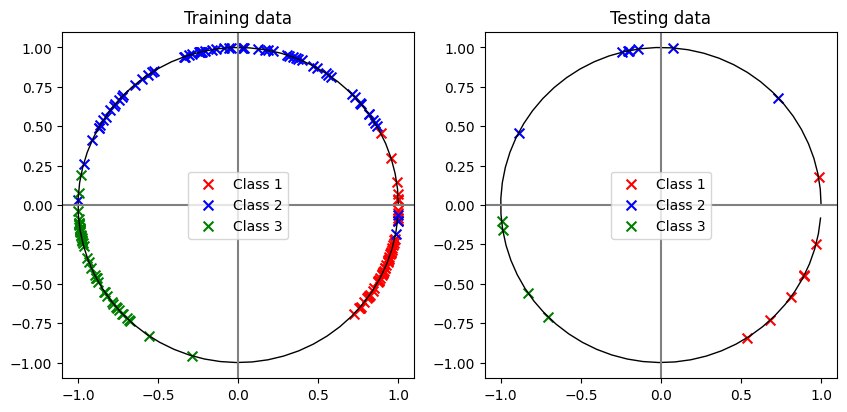

In [17]:
_X_train = pipeline.transform(X_train)
_X_test = pipeline.transform(X_test)

figure = plt.figure(figsize=(10,4.5), num=2)
sub1, sub2 = figure.subplots(nrows=1, ncols=2)

class_0_data = np.asarray([_X_train[i] for i in range(len(_X_train)) if y_train[i] == 0])
class_1_data = np.asarray([_X_train[i] for i in range(len(_X_train)) if y_train[i] == 1])
class_2_data = np.asarray([_X_train[i] for i in range(len(_X_train)) if y_train[i] == 2])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
class_2 = sub1.scatter(class_2_data[:,0], class_2_data[:,1], color='green', marker='x', s=50)

sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)

sub1.set_title("Training data")
sub1.legend([class_0, class_1, class_2], ["Class 1", "Class 2", "Class 3"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

class_0_data_test = np.asarray([_X_test[i] for i in range(len(_X_test)) if y_test[i] == 0])
class_1_data_test = np.asarray([_X_test[i] for i in range(len(_X_test)) if y_test[i] == 1])
class_2_data_test = np.asarray([_X_test[i] for i in range(len(_X_test)) if y_test[i] == 2])

class_0 = sub2.scatter(class_0_data_test[:,0], class_0_data_test[:,1], color='red', marker='x', s=50)
class_1 = sub2.scatter(class_1_data_test[:,0], class_1_data_test[:,1], color='blue', marker='x', s=50)
class_2 = sub2.scatter(class_2_data_test[:,0], class_2_data_test[:,1], color='green', marker='x', s=50)

sub2.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub2.set_title("Testing data")
sub2.legend([class_0, class_1, class_2], ["Class 1", "Class 2", "Class 3"])
sub2.axvline(color='gray')
sub2.axhline(color='gray')

In [18]:
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

In [19]:
prediction

[0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1]

## Accuracy

In [20]:
"Test Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction, y_test)])/len(prediction)
)

'Test Accuracy: 0.9444444444444444'

In [ ]:
prediction_train = pipeline.predict(X_train)

In [ ]:
"Train Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction_train, y_train)])/len(prediction_train)
)

## Comparison to theoretical results

In [ ]:
for i in range(len(_X_test)):
    p_acc_theory = QmlHadamardNeighborClassifier.p_acc_theory(_X_train, y_train, _X_test[i])
    print(f"{qml.last_predict_p_acc[i]:.4f} ~~ {p_acc_theory:.4f}")

In [ ]:
for i in range(len(_X_test)):
    p_label_theory = QmlHadamardNeighborClassifier.p_label_theory(_X_train, y_train, _X_test[i], prediction[i])
    print(f"{qml.last_predict_probability[i]:.4f} ~~ {p_label_theory:.4f}")

In [ ]:
print(qml._last_predict_circuits[0].qasm())